In [78]:
##-------------------------------------
## Step 0) Load Libraries
##-------------------------------------
##------------------------------------------------
## ~~ Manipulation
## Array Manipulation
import numpy as np                       
## Data Frame Manipulation
import pandas as pd 
## Change Directory in Python
import os                              
##------------------------------------------------
##------------------------------------------------
## ~~ Visualization
## Plot
#from matplotlib.pylab as plt  
from matplotlib.pyplot import *        
%matplotlib inline
rcParams['figure.figsize'] = 10, 6
##------------------------------------------------
##------------------------------------------------
## ~~ Date Manipulation
from datetime import datetime
##------------------------------------------------

##------------------------------------------------
## ~~ Miscellaneous
## Generate randdom numbers
import random
##------------------------------------------------

In [85]:
##-------------------------------------
## Step 1)  Relevant Functions
##-------------------------------------
def new_weight_calculate(x_after, x_before,window_number,after_percent):
     """
    Function Name: new_weight_calculate
    Input: future list, past list, windom size, future percent
    Output: new weight
    Purpose: calculate new weight based on the future, the past and a random effect
    """
    ## Determine the percent that the before weight will impact new value
    before_percent = 1 - after_percent
    
    ## Remove 'nan' from list
    x_after_no_nan = [x for x in x_after  if  str(x) != 'nan']
    x_before_no_nan = [x for x in x_before  if  str(x) != 'nan']

    ## Create Appropriate window**
    x_after_na_window = x_after_no_nan[:window_number]
    x_before_na_window = x_before_no_nan[-window_number:]

    ## Calculate before effect
    before_effect = before_percent*np.mean(x_before_na_window)

    ## Calculate after effect
    after_effect = after_percent*np.mean(x_after_na_window)

    ## Calculate Random effect
    random_effect = random.uniform(-0.5, 0.5)
    
    ## Determine the new weight based on after, before and random
    new_weight = after_effect + before_effect + random_effect
    return(new_weight)

def impute_missing(x,window_number,after_percent):
    """
    Function Name: impute_missing
    Input: list, size of window, percent of future
    Output: list with imputed values
    Purpose: Ability to impute based on future and past values
    """
    for i in range(len(x)):
        ## Determine if value is nan
        if np.isnan(x[i]) == True:
            ## Look before nan value
            x_before = x[:i]
            ## Look after nan value
            x_after = x[(i+1):]
            ## Use before and after nan value to determine 
            x[i] = new_weight_calculate(x_after,
                                        x_before,
                                        window_number,
                                        after_percent)
    return(x)



In [24]:
##-------------------------------------
## Step 2) Load Data
##-------------------------------------
default_path = 'C:/Users/james/OneDrive/Documents/Important_Files/Fitness Analysis'
os.chdir(default_path)
weight = pd.read_csv('weight_eman.csv',parse_dates=['Date'])


In [25]:
##-------------------------------------
## Step 2) Preliminary Curation of Data
##-------------------------------------
## Change Timestamp into datetime
weight['Date'] = pd.to_datetime(weight['Date'], 
                                infer_datetime_format=True)
## Turn 'Date' into index
weight = weight.set_index(['Date'])
## Impute Missing weight Values
weight['Weight_Imputed'] = impute_missing(weight_list,10,0.75)

Text(0,0.5,'Weight (lbs)')

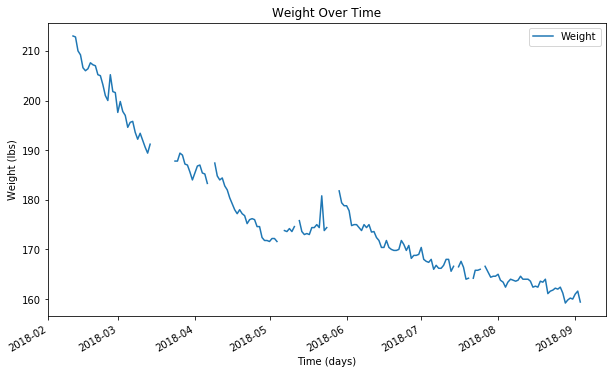

In [26]:
ax =  weight.plot(title = 'Weight Over Time')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Weight (lbs)')
